In [ ]:
import pandas as pd
import seaborn as sns

# load the data
df = pd.read_csv("Word Memory Game (Responses) - raw data.csv")
df["id"] = range(len(df))
df = df.rename(columns={"Are you Hispanic or are you fluent in Spanish? ": "spanish", 
                       "What are your fluency levels in other languages? Example response: English (fluent), Spanish (fluent), French (basic reading + writing)": "languages"})
df

,Timestamp,fork,dog,embarrassed1,woman,snow,weight,football1,delicious,egg,...,brown,wheels,jail,enter,soccer,jump,spanish,languages,Spanish,id
0,12/5/2022 9:48:44,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,Yes,NaN,1,0
1,12/5/2022 12:18:13,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,Yes,NaN,1,1
2,12/5/2022 20:08:40,no,no,no,no,no,no,no,no,no,...,no,no,no,no,yes,no,Wouldn’t you like to know :D,NaN,1,2
3,12/6/2022 14:03:04,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,No,"English (fluent), Chinese (fluent), Korean (ba...",0,3
4,12/6/2022 14:03:18,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,No,"english (fluent), chinese (fluent), german (ve...",0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,12/7/2022 23:09:03,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,No,"English (fluent), Spanish (basic reading + wri...",0,236
237,12/8/2022 0:21:14,no,no,no,no,no,no,no,no,no,...,no,no,no,no,yes,no,No,"French (basic reading + writing), Chinese (ora...",0,237
238,12/8/2022 0:30:36,no,no,no,no,no,no,no,no,no,...,no,no,no,no,yes,no,"I'm not fluent, but I can communicate if neces...","English (fluent), Spanish (basic conversation,...",0,238
239,12/8/2022 2:19:32,no,no,no,no,no,no,no,no,no,...,no,no,yes,no,no,no,No,"English (fluent), German (intermediate)",0,239


In [ ]:
# get the unique words from the experiment
words = df.columns[1:-3]
words

Index(['fork', 'dog', 'embarrassed', 'woman', 'snow', 'weight', 'football',
       'delicious', 'egg', 'excited', 'exit', 'juice', 'delight', 'bear',
       'football.1', 'red', 'embarrassed.1', 'walk', 'knife', 'polar', 'horny',
       'butter', 'baseball', 'government', 'scared', 'spoon', 'pregnant',
       'surprised', 'car', 'violence', 'exit.1', 'coach', 'bread', 'fraud',
       'company', 'football.2', 'crime', 'problem', 'sausage', 'delight.1',
       'excited.1', 'success', 'person', 'train', 'disappointed', 'brown',
       'wheels', 'jail', 'enter', 'soccer', 'jump'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# melt = convert to long format
melted = pd.melt(df, var_name="word", value_name="response", id_vars=["id", "Timestamp", "spanish", "languages"])
melted['word'] = pd.Categorical(melted['word'], categories=words, ordered=True)
melted = melted.sort_values(["id", "word"])
melted

,id,Timestamp,spanish,languages,word,response
0,0,12/5/2022 9:48:44,Yes,NaN,fork,no
231,0,12/5/2022 9:48:44,Yes,NaN,dog,no
462,0,12/5/2022 9:48:44,Yes,NaN,embarrassed,no
693,0,12/5/2022 9:48:44,Yes,NaN,woman,no
924,0,12/5/2022 9:48:44,Yes,NaN,snow,no
...,...,...,...,...,...,...
10856,230,12/7/2022 12:52:17,No,"English (fluent), Turkmen (native), Russian (f...",wheels,no
11087,230,12/7/2022 12:52:17,No,"English (fluent), Turkmen (native), Russian (f...",jail,no
11318,230,12/7/2022 12:52:17,No,"English (fluent), Turkmen (native), Russian (f...",enter,no
11549,230,12/7/2022 12:52:17,No,"English (fluent), Turkmen (native), Russian (f...",soccer,no


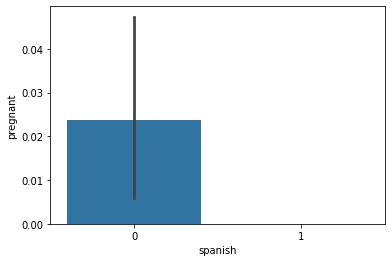

In [ ]:
df.pregnant = df.pregnant.replace({"yes": 1, "no": 0})
df["spanish"] = df["spanish"].replace({"Yes": 1, "No": 0})
df = df[df.spanish.isin([0, 1])]

sns.barplot(data=df, x="spanish", y="pregnant")

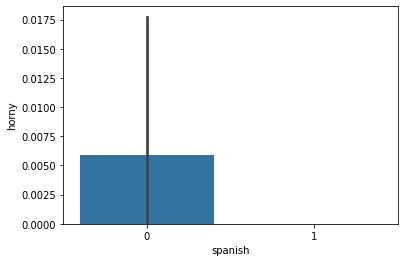

In [ ]:
df.horny = df.horny.replace({"yes": 1, "no": 0})
df["spanish"] = df["spanish"].replace({"Yes": 1, "No": 0})
df = df[df.spanish.isin([0, 1])]

sns.barplot(data=df, x="spanish", y="horny")

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-17-b85aae589a14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["success"] = df["spanish"].replace({"Yes": 1, "No": 0})


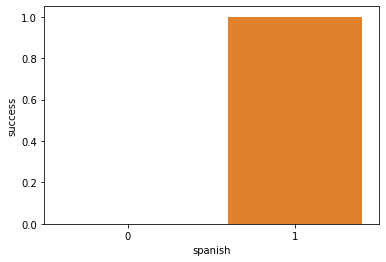

In [ ]:
df.success = df.success.replace({"yes": 1, "no": 0})
df["success"] = df["spanish"].replace({"Yes": 1, "No": 0})
df = df[df.spanish.isin([0, 1])]

sns.barplot(data=df, x="spanish", y="success")

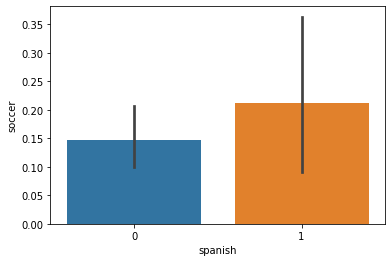

In [ ]:
df.soccer = df.soccer.replace({"yes": 1, "no": 0})
df["spanish"] = df["spanish"].replace({"Yes": 1, "No": 0})
df = df[df.spanish.isin([0, 1])]

sns.barplot(data=df, x="spanish", y="soccer")

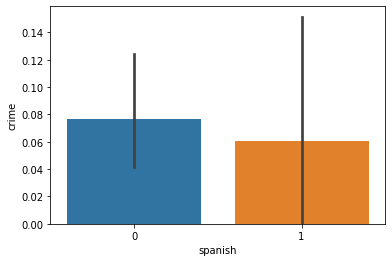

In [ ]:
df.crime = df.crime.replace({"yes": 1, "no": 0})
df["spanish"] = df["spanish"].replace({"Yes": 1, "No": 0})
df = df[df.spanish.isin([0, 1])]

sns.barplot(data=df, x="spanish", y="crime")

In [ ]:
nonspanish = df.groupby(['Spanish']).size()[0]
spanish = df.groupby(['Spanish']).size()[1]
nonspanish, spanish, nonspanish+spanish

(174, 37, 211)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


{'embarrased': [0.8918918918918919, 0.9597701149425287],
 'football': [0.8108108108108109, 0.8390804597701149],
 'football2': [0.972972972972973, 0.9942528735632183],
 'exit': [0.8648648648648649, 0.9540229885057471],
 'excited': [0.972972972972973, 0.9655172413793104],
 'delight': [0.7297297297297297, 0.8045977011494253]}

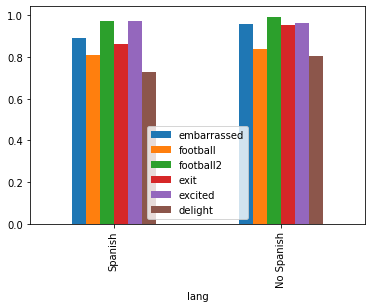

In [ ]:
#Analyze Repeats
df_repeat = df[['embarrassed2','football2','football3','exit2','excited2','delight2','Spanish']]
df.embarrassed2 = df.embarrassed2.replace({"yes": 1, "no": 0})
df.football2 = df.football2.replace({"yes": 1, "no": 0})
df.football3 = df.football3.replace({"yes": 1, "no": 0})
df.exit2 = df.exit2.replace({"yes": 1, "no": 0})
df.excited2 = df.excited2.replace({"yes": 1, "no": 0})
df.delight2 = df.delight2.replace({"yes": 1, "no": 0})

nonspanish = df_repeat.groupby(['Spanish']).size()[0]
spanish = df_repeat.groupby(['Spanish']).size()[1]

#sns.barplot(data=df_repeat, x='Spanish', y='embarrassed2')

emb = df_repeat.groupby(['Spanish','embarrassed2']).size()
fb = df_repeat.groupby(['Spanish','football2']).size()
fb2 = df_repeat.groupby(['Spanish','football3']).size()
exit = df_repeat.groupby(['Spanish','exit2']).size()
exc = df_repeat.groupby(['Spanish','excited2']).size()
delight = df_repeat.groupby(['Spanish','delight2']).size()

accu = {
    'embarrased': [emb[1][1]/spanish, emb[0][1]/nonspanish],
    'football': [fb[1][1]/spanish, fb[0][1]/nonspanish],
    'football2': [fb2[1][1]/spanish, fb2[0][1]/nonspanish],
    'exit': [exit[1][1]/spanish, exit[0][1]/nonspanish],
    'excited': [exc[1][1]/spanish, exc[0][1]/nonspanish],
    'delight': [delight[1][1]/spanish, delight[0][1]/nonspanish]
}
emb = pd.DataFrame({
    'lang': ['Spanish','No Spanish'],
    'embarrassed': [accu['embarrased'][0], accu['embarrased'][1]],
    'football': [accu['football'][0], accu['football'][1]],
    'football2': [accu['football2'][0], accu['football2'][1]],
    'exit': [accu['exit'][0], accu['exit'][1]],
    'excited': [accu['excited'][0], accu['excited'][1]],
    'delight': [accu['delight'][0], accu['delight'][1]]
})
emb[['lang', 'embarrassed', 'football', 'football2', 'exit', 'excited', 'delight']].plot(x='lang', kind='bar')
accu

{'horny': [1.0, 1.0],
 'preg': [0.9827586206896551, 0.9836065573770492],
 'soc': [0.8448275862068966, 0.8524590163934426],
 'crime': [0.9137931034482759, 0.9344262295081968],
 'success': [0.9655172413793104, 0.8961748633879781]}

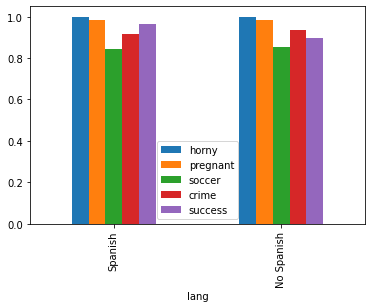

In [ ]:
#Analyze False Cognates
df_false = df[['horny','pregnant','soccer','crime','success','Spanish']]

#df.pregnant = df.pregnant.replace({"yes": 1, "no": 0})
df.soccer = df.soccer.replace({"yes": 1, "no": 0})
df.crime = df.crime.replace({"yes": 1, "no": 0})
df.success = df.success.replace({"yes": 1, "no": 0})

nonspanish = df_false.groupby(['Spanish']).size()[0]
spanish = df_false.groupby(['Spanish']).size()[1]

#sns.barplot(data=df_repeat, x='Spanish', y='embarrassed2')

horny = df_false.groupby(['Spanish','horny']).size()
preg = df_false.groupby(['Spanish','pregnant']).size()
soc = df_false.groupby(['Spanish','soccer']).size()
crime = df_false.groupby(['Spanish','crime']).size()
success = df_false.groupby(['Spanish','success']).size()
horny

accu = {
    'horny': [horny[1][0]/spanish, horny[0][0]/nonspanish],
    'preg': [preg[1][0]/spanish, preg[0][0]/nonspanish],
    'soc': [soc[1][0]/spanish, soc[0][0]/nonspanish],
    'crime': [crime[1][0]/spanish, crime[0][0]/nonspanish],
    'success': [success[1][0]/spanish, success[0][0]/nonspanish],
}
emb = pd.DataFrame({
    'lang': ['Spanish','No Spanish'],
    'horny': [accu['horny'][0], accu['horny'][1]],
    'pregnant': [accu['preg'][0], accu['preg'][1]],
    'soccer': [accu['soc'][0], accu['soc'][1]],
    'crime': [accu['crime'][0], accu['crime'][1]],
    'success': [accu['success'][0], accu['success'][1]],
})
emb[['lang', 'horny', 'pregnant', 'soccer', 'crime', 'success']].plot(x='lang', kind='bar')
accu
#preg

number of responses 249
number of people who got 0 answers wrong: 105
percentage of people who got 0 answers wrong: 0.42168674698795183


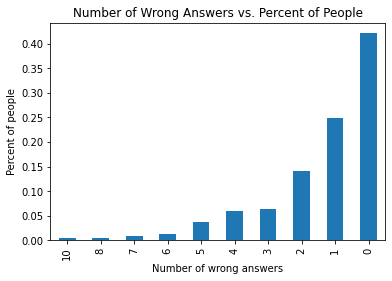

In [3]:
import pandas as pd
import seaborn as sns

# load the data
sf = pd.read_csv("Word Memory Game (Responses) - _grade_ sheet.csv")
sf = sf.rename(columns={'columns wrong': 'wrongNum',"Are you Hispanic or are you fluent in Spanish? ": "spanish", 'romance language?': 'romance'})
#sf["romance"] = sf["romance"].replace({"True": 1, "False": 0})
sf["id"] = range(len(sf))
sf=sf.sort_values(['wrongNum'], ascending=False)
numResponses=len(sf)
print('number of responses', numResponses)
print('number of people who got 0 answers wrong:', len(sf.loc[sf["wrongNum"] ==0]))
print('percentage of people who got 0 answers wrong:', 105/numResponses)
sf.wrongNum.value_counts().apply(lambda x: x/numResponses) .sort_values().plot(xlabel ='Number of wrong answers', ylabel='Percent of people', kind = 'bar', title="Number of Wrong Answers vs. Percent of People")
#sf

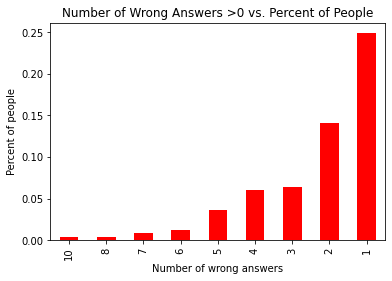

In [5]:
#plotting the number of answers people got wrong versus percent of people with that amount of wrong responses
#i.e, around 25% got 1 of the answers wrong
import pandas as pd
import seaborn as sns

# load the data
sf = pd.read_csv("Word Memory Game (Responses) - _grade_ sheet.csv")
sf = sf.rename(columns={'columns wrong': 'wrongNum',"Are you Hispanic or are you fluent in Spanish? ": "spanish", 'romance language?': 'romance'})
#sf["romance"] = sf["romance"].replace({"True": 1, "False": 0})
sf["id"] = range(len(sf))
sf=sf.sort_values(['wrongNum'], ascending=False)
sf = sf.loc[sf["wrongNum"] >0 ]
sf.wrongNum.value_counts().apply(lambda x: x/numResponses) .sort_values().plot(color='red',xlabel ='Number of wrong answers', ylabel='Percent of people', kind = 'bar', title="Number of Wrong Answers >0 vs. Percent of People")
#sf

In [6]:
romance_languages = sf.groupby(['romance']).size()[0]
nonromance_languages = sf.groupby(['romance']).size()[1]
#nonromance_languages, romance_languages, nonromance_languages+romance_languages

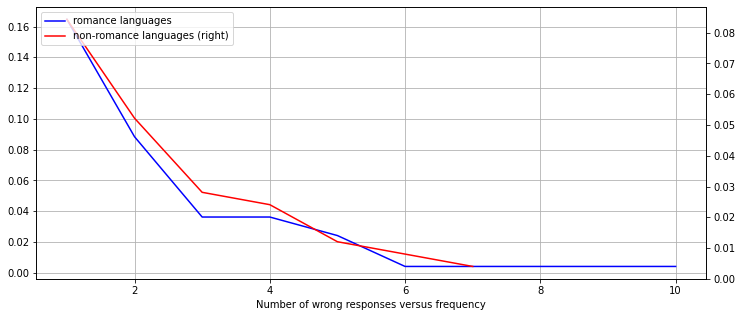

In [7]:
import matplotlib.pyplot as plt

sf_romance = sf[sf['romance'] ==True]
sf_nonromance=sf[sf['romance'] == False]
sf_romance=sf_romance.wrongNum.value_counts().apply(lambda x: x/numResponses) .sort_values()
sf_nonromance=sf_nonromance.wrongNum.value_counts().apply(lambda x: x/numResponses) .sort_values()

plt.figure(figsize=(12,5))
plt.xlabel('Number of wrong responses versus frequency')

ax1 = sf_romance.plot(color='blue', grid=True, label='romance languages')
ax2 = sf_nonromance.plot(color='red', grid=True, secondary_y=True, label='non-romance languages')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()